In [1]:
from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import solar_system_ephemeris

solar_system_ephemeris.set("jpl")

from poliastro.bodies import Sun, Earth, Moon
from poliastro.ephem import Ephem
from poliastro.twobody import Orbit
from poliastro.twobody.sampling import EpochsArray

EPOCH = Time("2017-09-01 12:05:50", scale="tdb")
C_FLORENCE = "#000"
C_MOON = "#999"

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

Ephemerides at 100 epochs from J2000.202 (TT) to J2002.083 (TT)

In [4]:
granv = pd.read_csv('/Users/yoachim/rubin_sim_data/orbits/granvik_5k.txt', sep=' ')

In [5]:
granv

,a,e,inc,Omega,argPeri,meanAnomaly,epoch,H,MOID,objId,g,sed_filename
0,1.810322,0.457012,8.524691,321.309082,218.878296,194.936127,59853.0,24.902994,0.031219,242880,0.15,S.dat
1,1.390497,0.458398,43.303799,232.109802,241.479919,91.117035,59853.0,24.474217,0.121781,175331,0.15,S.dat
2,1.657430,0.493258,5.164651,302.836609,266.812195,161.882599,59853.0,23.124664,0.006973,647396,0.15,S.dat
3,2.073438,0.554929,10.493196,185.436066,139.102676,261.443756,59853.0,24.706829,0.085103,492747,0.15,S.dat
4,1.338621,0.133787,39.041023,341.855743,186.264435,40.988487,59853.0,24.607513,0.168620,546031,0.15,S.dat
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.624333,0.446512,54.509521,355.366943,314.864990,99.870674,59853.0,23.640100,0.114199,23696,0.15,S.dat
4996,2.984417,0.763269,41.823479,333.647278,74.136383,7.006821,59853.0,24.729494,0.234624,33632,0.15,C.dat
4997,1.787739,0.404088,23.665245,351.980927,102.490379,126.487000,59853.0,24.963896,0.084646,214385,0.15,S.dat
4998,2.174124,0.421286,4.020179,38.037006,138.996429,290.406464,59853.0,24.503445,0.267403,106108,0.15,S.dat


In [6]:
gran=granv.iloc[20]

orb = Orbit.from_classical(Sun, gran['a']*u.AU, gran['e']*u.one, gran['inc']*u.deg,
                           gran['Omega']*u.deg, gran['argPeri']*u.deg, gran['meanAnomaly']*u.deg)

In [7]:
times = Time(np.arange(61160, 64810), format='mjd')


In [8]:
ephem = orb.to_ephem(strategy=EpochsArray(epochs=times))

/Users/yoachim/anaconda3/envs/poli/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3405 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [9]:
cart = ephem.sample()

In [10]:
cart

<CartesianRepresentation (x, y, z) in km
    [(55089918.3898743 , -1.75081810e+08, 62278416.1738437 ),
     (56347433.14066301, -1.73478483e+08, 61355304.48223842),
     (57597114.21962848, -1.71851041e+08, 60423664.04876836), ...,
     (87444262.2466555 , -1.15301949e+08, 30769912.7612178 ),
     (88239115.39328903, -1.12822220e+08, 29572477.16313295),
     (89006018.98524159, -1.10306761e+08, 28365677.23745708)]
 (has differentials w.r.t.: 's')>

In [11]:
# now just need to go from cartisian representation to RA, dec
from astropy.coordinates import CartesianRepresentation, SkyCoord, EarthLocation, SkyCoord, AltAz

In [12]:
c = SkyCoord(cart.x, cart.y, cart.z, representation_type='cartesian', obstime=times)

In [13]:
c

<SkyCoord (ICRS): (x, y, z) in km
    [(55089918.3898743 , -1.75081810e+08, 62278416.1738437 ),
     (56347433.14066301, -1.73478483e+08, 61355304.48223842),
     (57597114.21962848, -1.71851041e+08, 60423664.04876836), ...,
     (87444262.2466555 , -1.15301949e+08, 30769912.7612178 ),
     (88239115.39328903, -1.12822220e+08, 29572477.16313295),
     (89006018.98524159, -1.10306761e+08, 28365677.23745708)]>

In [14]:
ack = c.fk5

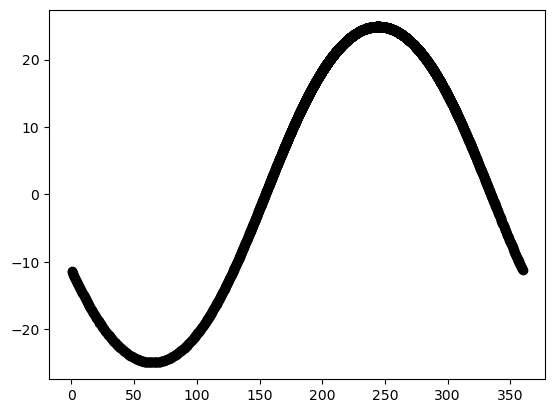

In [15]:
plt.plot(ack.ra, ack.dec, 'ko')

In [16]:
from_earth = c.gcrs

/Users/yoachim/anaconda3/envs/poli/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3405 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/yoachim/anaconda3/envs/poli/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3405 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [17]:
from_earth

<SkyCoord (GCRS: obstime=[61160. 61161. 61162. ... 64807. 64808. 64809.], obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, km)
    [(333.23194011, 27.55839286, 2.17300094e+08),
     (334.10324213, 27.75223664, 2.15615743e+08),
     (334.98552503, 27.94339601, 2.13932265e+08), ...,
     (350.04267021, 16.65317354, 2.25267176e+08),
     (351.18208389, 16.66563462, 2.23889479e+08),
     (352.33638332, 16.67195684, 2.22526049e+08)]>

Text(0, 0.5, 'dec')

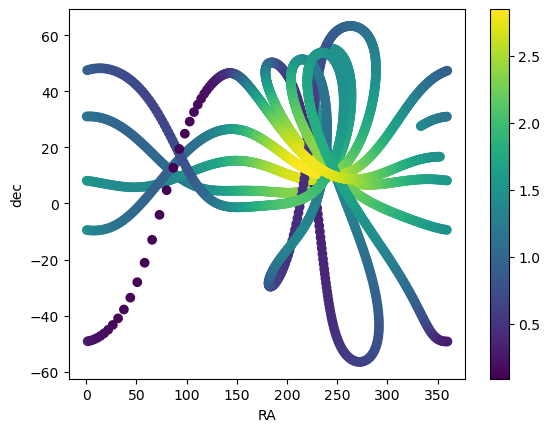

In [18]:
plt.scatter(from_earth.ra, from_earth.dec, c=from_earth.distance.to(u.au))
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('dec')

Text(0, 0.5, 'Distance (AU)')

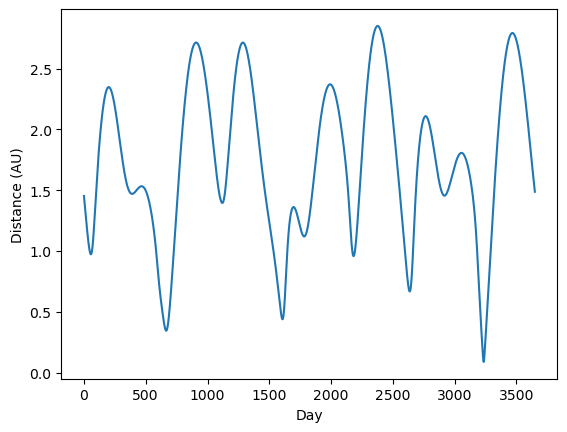

In [19]:
plt.plot(from_earth.distance.to(u.au))
plt.xlabel('Day')
plt.ylabel('Distance (AU)')

In [20]:
# Can we get to to agree with Skyfield?

In [21]:
# let's try renaming some rows
gran2 = granv.rename(columns={'a': 'semimajor_axis_au', 'e': 'eccentricity', 'inc': 'inclination_degrees',
            'Omega': 'longitude_of_ascending_node_degrees', 'argPeri': 'argument_of_perihelion_degrees',
            'meanAnomaly': 'mean_anomaly_degrees', 'epoch': 'epoch_packed'})

In [39]:
row = gran2.iloc[20]

# no idea what this is for, let's just put in something that should work
row['epoch_packed'] = 'K237P'
row['designation'] = 'poop1'

/var/folders/jv/jdhmc2t93njct5cx375mztcr0000gn/T/ipykernel_48446/2129809292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['epoch_packed'] = 'K237P'
/var/folders/jv/jdhmc2t93njct5cx375mztcr0000gn/T/ipykernel_48446/2129809292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['designation'] = 'poop1'
/var/folders/jv/jdhmc2t93njct5cx375mztcr0000gn/T/ipykernel_48446/2129809292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [40]:
import skyfield
from skyfield.data import mpc
from skyfield.api import load


In [41]:
from skyfield.constants import GM_SUN_Pitjeva_2005_km3_s2 as GM_SUN

ts = load.timescale()
eph = load('de421.bsp')
sun, earth = eph['sun'], eph['earth']

t = ts.from_astropy(times)



In [42]:
obj = sun + mpc.mpcorb_orbit(row, ts, GM_SUN)
ra, dec, distance = earth.at(t).observe(obj).radec()

Text(0, 0.5, 'dec')

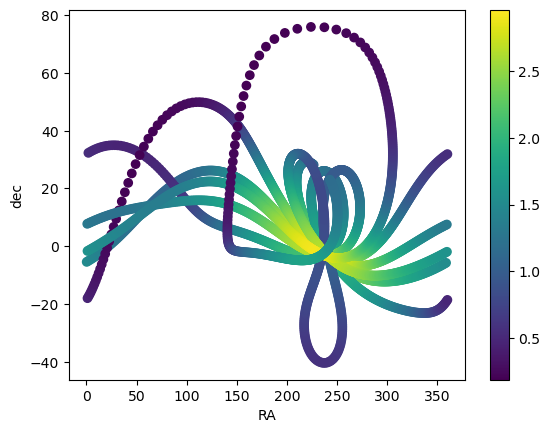

In [43]:
plt.scatter(ra._degrees, dec.degrees, c=distance.au)
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('dec')

In [37]:
with load.open(mpc.COMET_URL) as f:
    comets = mpc.load_comets_dataframe(f)


In [38]:
comets

,perihelion_year,perihelion_month,perihelion_day,perihelion_distance_au,eccentricity,argument_of_perihelion_degrees,longitude_of_ascending_node_degrees,inclination_degrees,magnitude_g,magnitude_k,designation,reference
0,1997,3,29.5659,0.889875,0.994969,130.4086,282.5551,89.3730,-2.0,4.0,C/1995 O1 (Hale-Bopp),MPEC 2022-S20
1,2026,6,14.6839,2.586989,0.314606,333.4132,40.0086,2.6010,11.5,4.0,P/1996 R2 (Lagerkvist),NK 1615
2,2027,9,6.3498,3.423897,0.243306,244.6480,159.0373,5.0265,13.0,2.0,P/1998 VS24 (LINEAR),MPC 75703
3,2025,10,29.8148,1.122018,0.672538,231.3118,137.8643,7.5649,20.0,2.0,P/1999 RO28 (LONEOS),NK 731
4,2025,12,22.9457,3.299357,0.210489,161.6708,285.2965,5.0299,13.5,2.0,P/1999 XN120 (Catalina),MPC 75704
...,...,...,...,...,...,...,...,...,...,...,...,...
972,2027,1,17.3998,5.497631,0.310432,21.0980,124.8563,10.5518,6.5,4.0,450P/LONEOS,MPEC 2022-TA6
973,2022,11,27.5345,2.798526,0.558470,186.6969,300.9123,26.4827,13.5,4.0,451P/Christensen,MPEC 2023-BF4
974,2023,4,25.7021,4.178160,0.427183,37.0548,123.7001,6.4226,9.0,4.0,452P/Sheppard-Jewitt,MPEC 2023-BF4
975,2017,9,9.4886,0.255240,1.199252,241.6845,24.5997,122.6778,23.0,2.0,1I/`Oumuamua,MPC107687


In [ ]:
# looks like the mysterious 'epoch_packed' makes a big difference in the skyfield output. So probably leaning poliastro now
